In [1]:
import sys
import random
sys.path.append("..")
from data import Lyric
from utils import model, attention_visualization

In [2]:
dataset = Lyric(batch_size=128, fix_length=32, target_vocab_size=10000)
net = model(dataset, model_name="李荣浩_50.pkl", train=False)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/dy/xjy0y7v97js5x1bghby2fnkm0000gn/T/jieba.cache
Loading model cost 0.616 seconds.
Prefix dict has been built succesfully.


In [3]:
def generator(title, total_sentence=16):
    encoder_input = dataset.process(title)
    song = []
    for i in range(total_sentence):
        s = []
        output = net.predict(encoder_input)
        word = dataset.logist2word(output)[0]
        if word in dataset.itos[:50] + [s[0] for s in song[-3:]]:
            word = dataset.logist2word(output, topn=3)
            word = random.choice(word)
        next_input = dataset.stoi[word]
        s.append(word)
        while word != "<eos>":
            output = net.next(next_input)
            word = dataset.logist2word(output)[0]
            next_input = dataset.stoi[word]
            s.append(word)
        song.append(s[:-1])
        encoder_input = dataset.process("".join(s[:-1]))
    song = ["".join(s) for s in song]
    return song

In [7]:
generator("不将就")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['那时候我以为爱的是生活',
 '我为什么会这样念念又不忘',
 '就这样就会这样',
 '你不用不自然',
 '你也不要说需要我原谅',
 '别让我多想',
 '别再让我流泪',
 '谁又会明白',
 '一生都这样',
 '不喜欢的人',
 '还是为了看你的眼光',
 '当你笑着看我看你一会',
 '你说的是我只是你',
 '我说哎呀',
 '没去过这地方是个季节',
 '经过了一段段']

In [7]:
generator("李白")

/home/albert/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['茫茫时空蔚蓝星球埋藏过往一段',
 '一轮明月照出的是光明和呐喊',
 '太阳光辉背后藏着深不见底的黑暗',
 '无穷的力量掩盖的是可笑的背叛',
 '英雄只能英雄都是一种鼓励',
 '多少灯亮到现在我们都不懂',
 '你的眼睛我的眼睛是一道伤痕累累',
 '简单的音符就越简单',
 '我知道你不喜欢什么',
 '听你说的是谁的另一个',
 '像诗说的就是什么',
 '现在你算了我知道',
 '因为你的好我还是',
 '你的我',
 '我为什么会这样念念又不忘',
 '就这样就会这样',
 '怕真相太难看',
 '我想对爱情还抱有希望',
 '反正你也没差',
 '我想我']

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


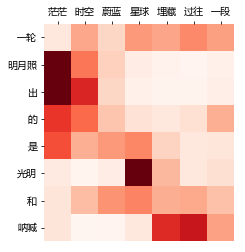

In [4]:
attention_visualization(dataset, net, "茫茫时空蔚蓝星球埋藏过往一段", "一轮明月照出的是光明和呐喊", file_name="3")

In [12]:
generator("演员")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['你说过的歌我还能写',
 '我为什么会这样念念又不忘',
 '我用你的牌你的悲伤',
 '还是为了什么',
 '为了什么我又找什么',
 '我的爱情就是你',
 '你喜欢的年纪',
 '说的不是不喜欢',
 '我想我都不了解',
 '我知道你后悔',
 '假如你在等我',
 '我可以',
 '我在等你',
 '在你的眼里',
 '你的眼睛让我感到失望',
 '原来你是个节拍']

In [8]:
generator("十年")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['我听说对不起',
 '也算是个约定',
 '都是一样',
 '每个人都活在现在',
 '都知道',
 '尝过几次心酸',
 '酸的刻骨明白',
 '再努力的装扮',
 '还是个越来越平凡',
 '人群中找温暖',
 '又想起感慨',
 '给我的美好',
 '这给我唱的是我的错',
 '每一个人都在等我的人',
 '都没有所谓',
 '失去的孤独']